In [325]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [360]:
###question：怎么把dataframe的全部数据打印出来？（太多行或太多列时）

#1.1

#read the tsv file
Sig_Eqs = pd.read_csv("earthquakes-2025-10-29_21-11-27_+0800.tsv",sep = '\t')
Sig_Eqs.head(10)

# choose the colunm ' Total Deaths' to compute the total number of deaths
Sig_Eqs1 = Sig_Eqs[['Country','Total Deaths']]

#sorted the number group by countries
Sig_Eqs1.groupby(['Country']).sum().sort_values('Total Deaths',ascending = False).head(10)

,Total Deaths
Country,
CHINA,2106524.0
TURKEY,1008863.0
IRAN,761654.0
SYRIA,487726.0
ITALY,423280.0
HAITI,323782.0
JAPAN,319443.0
AZERBAIJAN,319251.0
INDONESIA,282838.0


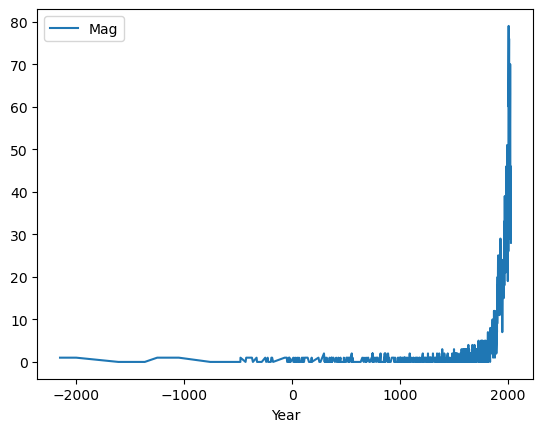

,Mag
Year,
1986.0,34
1987.0,34
1988.0,30
1989.0,35
1990.0,51
1991.0,42
1992.0,28
1993.0,26
1994.0,37


In [327]:
#1.2

#Plot the trend group by year
Sig_Eqs2 = Sig_Eqs[['Mag','Year']]
Sig_Eqs2.loc[Sig_Eqs2['Mag'] > 6.0]
Sig_Eqs2.groupby(['Year']).count().plot()
plt.show()

#view recent data
Sig_Eqs2.groupby(['Year']).count().tail(40)

#trend: below about 500 B.C. there is hardly any data. 公元前500年以后，记载的年平均6级以上地震数非常缓慢地波动上升，在1900年以前，仍保持在10次/年以下的数量，
#在1900年左右以后，呈现非常陡峭的指数型上升，2010年前后（2002-2019年）达到顶峰，达到60次/年上下，并在近几年有所下降，在28-46次/年上下浮动。
#原因：古代特别是公元前知识不普及，对地震记载少，流传下来的记载也少，仅有少数特别大的地震记载流传下来。近代以来，观测评估地震和区域间信息记载和传输的能力都提高后，
#记载下来的地震数显著上升。

In [328]:
# 1.3

Sig_Eqs3 = Sig_Eqs[['Year','Country','Mag']]
Sig_Eqs4 = Sig_Eqs3.groupby(['Country'])
Sig_Eqs5 = Sig_Eqs4.count()
Sig_Eqs6 = Sig_Eqs4.max('Mag')

def CountEq_LargestEq(country):

    a = Sig_Eqs5['Year'].loc[ country ]
    b = Sig_Eqs6['Year'].loc[ country ]
    
    #result="The total number of earthquakes since 2150 B.C. is "+str(a)+", the date of the largest earthquake ever happened in "+country+" is in "+str(b)+" ."
    #print(result)
    return(country, a, b)
    
CountEq_LargestEq('CHINA')
#CountEq_LargestEq("CHINA")


('CHINA', np.int64(623), np.float64(2025.0))

In [177]:
#整理创建我们想要的数组

Sig_Eqs7 = Sig_Eqs5[['Year']]
Sig_Eqs7['Total Number'] = Sig_Eqs5[['Year']]
Sig_Eqs7['Year'] = Sig_Eqs6['Year']
Sig_Eqs7 = Sig_Eqs7.reset_index()
Sig_Eqs7

,Country,Year,Total Number
0,AFGHANISTAN,2025.0,68
1,ALBANIA,2024.0,56
2,ALGERIA,2021.0,57
3,ANTARCTICA,2025.0,6
4,ANTIGUA AND BARBUDA,1974.0,3
...,...,...,...
153,VENEZUELA,2018.0,65
154,VIETNAM,2020.0,6
155,WALLIS AND FUTUNA (FRENCH TERRITORY),1993.0,1
156,YEMEN,1991.0,10


In [358]:
#没有运行函数，直接写出来了
#Apply to every country in the file, report results in a descending order
Sig_Eqs8 = Sig_Eqs7.sort_values('Total Number', ascending = False)

Sig_Eqs8
###question：怎么把全部数据显示出来？

,Country,Year,Total Number
28,CHINA,2025.0,623
71,JAPAN,2025.0,424
64,INDONESIA,2025.0,421
65,IRAN,2024.0,388
142,TURKEY,2025.0,358
...,...,...,...
129,SRI LANKA,1882.0,1
136,TASMAN SEA,1892.0,1
130,SUDAN,1993.0,1
155,WALLIS AND FUTUNA (FRENCH TERRITORY),1993.0,1


In [191]:
#函数循环没写出来
#Apply CountEq_LargestEq to every country in the file, report results in a descending order

#data = []

#for index in range(len(Sig_Eqs7)): 

#    #j = CountEq_LargestEq(Sig_Eqs7['Country'])
#    data.append(j)
#    #data = data + Sig_Eqs7.iloc[index]
    
    #data = np.array([j])
#print(data)


In [329]:
# 2.1
# read the hourly weather data  
# 对于字段内部含有逗号的csv文件，这里使用delimiter=None 让 Pandas 自动推断分隔符，engine='python' 使用 Python 引擎，适合处理复杂的分隔符。
#source：https://geek-docs.com/pandas/pandas-questions/591_pandas_retrieve_delimiter_infered_by_read_csv_in_pandas.html

sz = pd.read_csv("2281305.csv", delimiter = None, engine = 'python')

# 查看数据
print(sz)

            STATION                 DATE  SOURCE REPORT_TYPE CALL_SIGN  \
0       59493099999  2010-01-02T00:00:00       4       SY-MT     ZGSZ    
1       59493099999  2010-01-02T01:00:00       4       FM-15     ZGSZ    
2       59493099999  2010-01-02T02:00:00       4       FM-15     ZGSZ    
3       59493099999  2010-01-02T03:00:00       4       SY-MT     ZGSZ    
4       59493099999  2010-01-02T04:00:00       4       FM-15     ZGSZ    
...             ...                  ...     ...         ...       ...   
111979  59493099999  2020-09-11T17:00:00       4       FM-15     99999   
111980  59493099999  2020-09-11T18:00:00       4       FM-15     99999   
111981  59493099999  2020-09-11T19:00:00       4       FM-15     99999   
111982  59493099999  2020-09-11T20:00:00       4       FM-15     99999   
111983  59493099999  2020-09-11T21:00:00       4       FM-15     99999   

       QUALITY_CONTROL          AA1          AA2  AA3  AJ1  ...  OD1  OD2  \
0                 V020  06,0000,2,

In [331]:
# 每次必须要从这步开始运行才能画图（Why?见3.2）

# 使用split函数根据逗号将WND拆分成多列，source: https://blog.51cto.com/u_16213353/11587480

sz['WND_DIRECTION'],sz['WND_DIR_QUALITY'],sz['WND_TYPE'],sz['WND_SPEED_RATE'],sz['SPEES_QUALITY'] = zip(*sz['WND'].str.split(','))
sz.head()
wind = sz[['DATE','WND_DIRECTION','WND_DIR_QUALITY','WND_TYPE','WND_SPEED_RATE','SPEES_QUALITY']]

# get month column # source: https://deepinout.com/pandas/pandas-questions/448_pandas_substring_of_an_entire_column_in_pandas_dataframe.html
wind['Time'] = wind['DATE'].str.slice(0,7)

# Change string to timestamp
#wind['DATE'] = pd.to_datetime(wind['DATE'])
wind['Time'] = pd.to_datetime(wind['Time'])

# change the type of the wind speed data
wind['WND_SPEED_RATE'] = wind['WND_SPEED_RATE'].astype(float)
wind

C:\Users\YiChen\AppData\Local\Temp\ipykernel_27332\2736706995.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind['Time'] = wind['DATE'].str.slice(0,7)
C:\Users\YiChen\AppData\Local\Temp\ipykernel_27332\2736706995.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind['Time'] = pd.to_datetime(wind['Time'])
C:\Users\YiChen\AppData\Local\Temp\ipykernel_27332\2736706995.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,DATE,WND_DIRECTION,WND_DIR_QUALITY,WND_TYPE,WND_SPEED_RATE,SPEES_QUALITY,Time
0,2010-01-02T00:00:00,040,1,N,20.0,1,2010-01-01
1,2010-01-02T01:00:00,999,9,V,10.0,1,2010-01-01
2,2010-01-02T02:00:00,999,9,C,0.0,1,2010-01-01
3,2010-01-02T03:00:00,140,1,N,10.0,1,2010-01-01
4,2010-01-02T04:00:00,300,1,N,40.0,1,2010-01-01
...,...,...,...,...,...,...,...
111979,2020-09-11T17:00:00,170,1,N,30.0,1,2020-09-01
111980,2020-09-11T18:00:00,180,1,N,40.0,1,2020-09-01
111981,2020-09-11T19:00:00,220,1,V,30.0,1,2020-09-01
111982,2020-09-11T20:00:00,260,1,N,30.0,1,2020-09-01


In [201]:
# to see if there is missing value
wind.sort_values('WND_SPEED_RATE', ascending = False)

# remove missing data
wind = wind.loc[ (wind['WND_SPEED_RATE']!=9999) ]

# consider the scaling factor
wind['WND_SPEED_RATE'] = wind['WND_SPEED_RATE']/10

# check the data
wind.sort_values('WND_SPEED_RATE', ascending = False)

C:\Users\YiChen\AppData\Local\Temp\ipykernel_2312\676504514.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind['WND_SPEED_RATE'] = wind['WND_SPEED_RATE']/10


,DATE,WND_DIRECTION,WND_DIR_QUALITY,WND_TYPE,WND_SPEED_RATE,SPEES_QUALITY,Time
91004,2018-09-16 08:00:00,100,1,N,19.0,1,2018-09-01
91003,2018-09-16 07:00:00,080,1,N,19.0,1,2018-09-01
91002,2018-09-16 06:00:00,060,1,N,18.0,1,2018-09-01
91006,2018-09-16 09:00:00,120,1,N,18.0,1,2018-09-01
90999,2018-09-16 04:00:00,030,1,N,17.0,1,2018-09-01
...,...,...,...,...,...,...,...
95193,2019-02-03 18:00:00,999,9,C,0.0,1,2019-02-01
95151,2019-02-02 11:00:00,999,9,C,0.0,1,2019-02-01
95071,2019-01-30 23:00:00,999,9,C,0.0,1,2019-01-01
95001,2019-01-28 18:00:00,999,9,C,0.0,1,2019-01-01


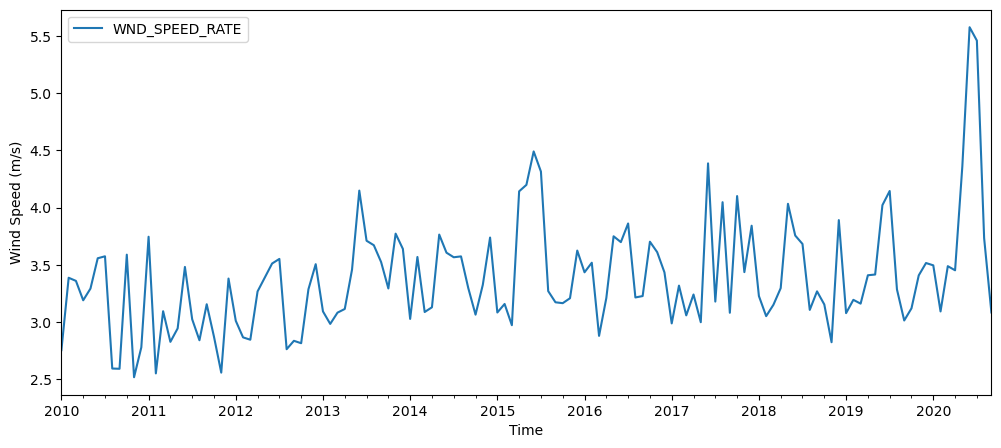

In [202]:
# 创建时间序列
# Reset index to have a time series
wind = wind.set_index('Time')
wind

# Plot an averaged wind speed rate time series group by months
plot = wind.groupby(['Time']).mean(['WND_SPEED_RATE']).plot(figsize=(12, 5))
plot.set_ylabel('Wind Speed (m/s)')
plt.show()

#Trend: 风速有一个微弱的上升趋势


# 趋势线的绘制(没跑出来）
# 计算线性回归系数
#z = np.polyfit(wind['Time'].values, wind['WND_SPEED_RATE'], 1)
#p = np.poly1d(z)
# 绘制趋势线
#plt.plot(wind['Time'], p(wind['Time']), "r--", label="Trend Line")

In [359]:
#3.1

#尝试过去NCEI上下载广州市附近站点的小时数据，不知道为什么选中站点后没有数据集

#开始选用这个数据，后来没有做
# #source: https://data.casearth.cn/dataset/5feae825819aec33049b7bd1
#引用地址： 尹君.“一带一路”沿线国家人口数据（1960-2017年），国家青藏高原科学数据中心,2020.doi:9dea5829-4ac0-47f3-8840-258b921c7ebc/
#read the xlsx file
#population = pd.read_excel("1960-2017年“一带一路”沿线国家人口数据.xlsx")
#population
#remove missing point
#no missing point
#创建时间序列
#plot = wind.groupby(['Time']).mean(['WND_SPEED_RATE']).plot(figsize=(12, 5))
#plot.set_ylabel('Wind Speed (m/s)')
#plt.show()
#populationT = population.T
#populationT

#选用数据
# 孟加拉国达卡市气象站点419230的监测数据（2019） # source: https://data.casearth.cn/dataset/5feae826819aec33049b7c14
# 引用地址: 葛咏.孟加拉国达卡市气象站点监测数据（2016-2019）,国家青藏高原科学数据中心,2020.doi:10.11888/Meteoro.tpdc.270311
# 来自NCEI，包括气温、风速、露点和降水等信息

#read the csv file
data = pd.read_csv("419230-99999-2019.csv")
#data
#data.info()

#表头解释 #https://www.czqxj.net.cn/qihou_334922 #https://blog.csdn.net/long1657/article/details/9316691
#STN---WBAN 气象站号 YEARMODA 年月日 TEMP 气温 DEWP 露点（dew point） SLP 海平面气压（Sea level pressure） STP 本站气压(station pressure) VISIB 能见度 （Visibility）
#WDSP 风向风速（wind direction ; speed） MXSPD 最大风速 (max. speed) GUST 阵风 MAX 最大 MIN 最小 PRCP 降水量 SNDP雪深 
#FRSHTT标志当天是1否0发生了雾/雨/雪/冰雹/雷/台风


#if there is missing data
data.max()
#3 columns has 999.9

#only MXSPD has some 999.9 for missing data, the other 2 are all 999.9
data.head(10)

#remove missing data
data = data.loc[ (data['MXSPD']!=999.9) ]
data

###question：怎么把全部数据显示出来？


,STN---,WBAN,YEAR,MODA,YEARMODA,TEMP,NTEMP,DEWP,NDEWP,SLP,...,MXSPD,GUST,MAX,TMAX,MIN,TMIN,PRCP,TPRCP,SNDP,FRSHTT
0,419230,99999,2019,101,20190101,72.8,4,50.0,4,1017.8,...,2.9,999.9,80.6,*,56.1,,0.00,G,999.9,0
1,419230,99999,2019,102,20190102,65.3,4,53.2,4,1017.7,...,1.9,999.9,78.4,*,56.8,*,0.00,G,999.9,0
2,419230,99999,2019,103,20190103,69.1,7,51.3,7,1018.0,...,1.9,999.9,79.7,,55.4,,0.00,G,999.9,0
3,419230,99999,2019,104,20190104,62.5,6,50.3,6,1018.7,...,2.9,999.9,76.6,,55.2,,0.00,G,999.9,0
4,419230,99999,2019,105,20190105,66.3,5,52.2,5,1016.7,...,2.9,999.9,79.5,,53.6,,0.00,G,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,419230,99999,2019,1227,20191227,61.2,8,56.8,8,1014.2,...,5.1,999.9,65.7,,57.6,*,0.07,G,999.9,110000
217,419230,99999,2019,1228,20191228,60.8,8,55.8,8,1015.6,...,2.9,999.9,69.3,,55.6,,0.00,G,999.9,100000
218,419230,99999,2019,1229,20191229,63.6,8,54.7,8,1014.8,...,2.9,999.9,77.4,,54.5,,0.00,G,999.9,100000
219,419230,99999,2019,1230,20191230,64.7,8,55.4,8,1015.5,...,2.9,999.9,77.7,,55.6,,0.00,G,999.9,0


In [345]:
#3.2

#创建时间序列

# Change string to timestamp
data['YEARMODA'] = data['YEARMODA'].astype(str)
data

,STN---,WBAN,YEAR,MODA,YEARMODA,TEMP,NTEMP,DEWP,NDEWP,SLP,...,MXSPD,GUST,MAX,TMAX,MIN,TMIN,PRCP,TPRCP,SNDP,FRSHTT
0,419230,99999,2019,101,20190101,72.8,4,50.0,4,1017.8,...,2.9,999.9,80.6,*,56.1,,0.00,G,999.9,0
1,419230,99999,2019,102,20190102,65.3,4,53.2,4,1017.7,...,1.9,999.9,78.4,*,56.8,*,0.00,G,999.9,0
2,419230,99999,2019,103,20190103,69.1,7,51.3,7,1018.0,...,1.9,999.9,79.7,,55.4,,0.00,G,999.9,0
3,419230,99999,2019,104,20190104,62.5,6,50.3,6,1018.7,...,2.9,999.9,76.6,,55.2,,0.00,G,999.9,0
4,419230,99999,2019,105,20190105,66.3,5,52.2,5,1016.7,...,2.9,999.9,79.5,,53.6,,0.00,G,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,419230,99999,2019,1227,20191227,61.2,8,56.8,8,1014.2,...,5.1,999.9,65.7,,57.6,*,0.07,G,999.9,110000
217,419230,99999,2019,1228,20191228,60.8,8,55.8,8,1015.6,...,2.9,999.9,69.3,,55.6,,0.00,G,999.9,100000
218,419230,99999,2019,1229,20191229,63.6,8,54.7,8,1014.8,...,2.9,999.9,77.4,,54.5,,0.00,G,999.9,100000
219,419230,99999,2019,1230,20191230,64.7,8,55.4,8,1015.5,...,2.9,999.9,77.7,,55.6,,0.00,G,999.9,0


In [346]:
data['YEARMODA'] = data['YEARMODA'].str.slice(0,4) + '-' + data['YEARMODA'].str.slice(4,6) + "-" + data['YEARMODA'].str.slice(6,8)
#思考：because of 这里如果多次运行会持续添加‘-‘，导致下一步运行失败，因此每次debug必须从这一步之前开始运行 （第2题同理）
#实际：必须从上上步开始debug why?
#data['YEARMODA'] = data['YEARMODA'].astype(str) 这一步也不行，要从这一步的上一步开始运行
pd.to_datetime(data['YEARMODA'])
data

,STN---,WBAN,YEAR,MODA,YEARMODA,TEMP,NTEMP,DEWP,NDEWP,SLP,...,MXSPD,GUST,MAX,TMAX,MIN,TMIN,PRCP,TPRCP,SNDP,FRSHTT
0,419230,99999,2019,101,2019-01-01,72.8,4,50.0,4,1017.8,...,2.9,999.9,80.6,*,56.1,,0.00,G,999.9,0
1,419230,99999,2019,102,2019-01-02,65.3,4,53.2,4,1017.7,...,1.9,999.9,78.4,*,56.8,*,0.00,G,999.9,0
2,419230,99999,2019,103,2019-01-03,69.1,7,51.3,7,1018.0,...,1.9,999.9,79.7,,55.4,,0.00,G,999.9,0
3,419230,99999,2019,104,2019-01-04,62.5,6,50.3,6,1018.7,...,2.9,999.9,76.6,,55.2,,0.00,G,999.9,0
4,419230,99999,2019,105,2019-01-05,66.3,5,52.2,5,1016.7,...,2.9,999.9,79.5,,53.6,,0.00,G,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,419230,99999,2019,1227,2019-12-27,61.2,8,56.8,8,1014.2,...,5.1,999.9,65.7,,57.6,*,0.07,G,999.9,110000
217,419230,99999,2019,1228,2019-12-28,60.8,8,55.8,8,1015.6,...,2.9,999.9,69.3,,55.6,,0.00,G,999.9,100000
218,419230,99999,2019,1229,2019-12-29,63.6,8,54.7,8,1014.8,...,2.9,999.9,77.4,,54.5,,0.00,G,999.9,100000
219,419230,99999,2019,1230,2019-12-30,64.7,8,55.4,8,1015.5,...,2.9,999.9,77.7,,55.6,,0.00,G,999.9,0


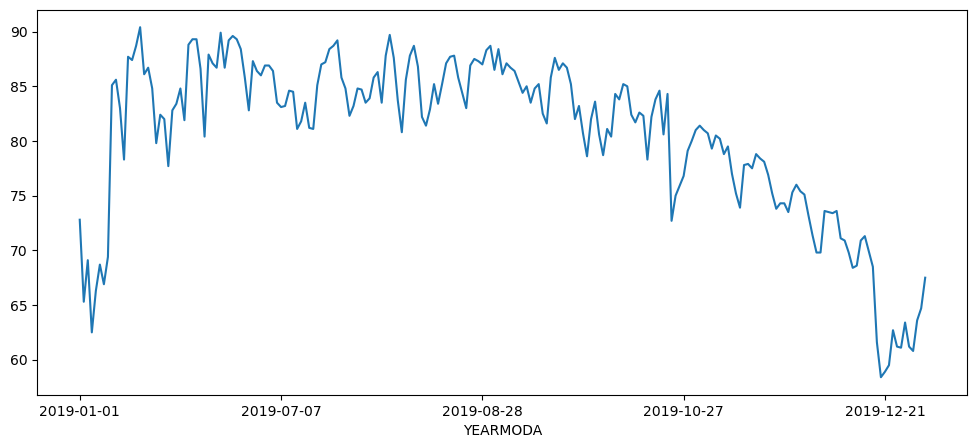

In [347]:
#例：创建一个温度的时间序列, Plot

# Reset index to have a time series
data = data.set_index('YEARMODA')
data

# Plot a simple TEMP time series
data['TEMP'].plot(figsize=(12, 5))
plt.show()

#在1月份时温度较低，为65华氏度左右，之后持续升高，在上半年达到高温，之后与其亚热带季风型气候相关，年中温度持续较高，10月份开始下降，10月底以后温度持续下降
#question:不均匀的时间表，如何把它变得均匀？


In [350]:
# 3.3

# 1.年平均温度
data['TEMP'].mean()
#约为80华氏度（26.67摄氏度）

np.float64(80.48578199052133)

In [355]:
#2. 年降水量
#年平均降水量
data['PRCP'].mean()
#约为0.23 mm/day.
#question：如何把格式括号（？）去掉？

np.float64(0.2314691943127962)

In [356]:
data['PRCP'].sum()
#年总降水量约为48mm.
#？怎么这么低？

np.float64(48.839999999999996)

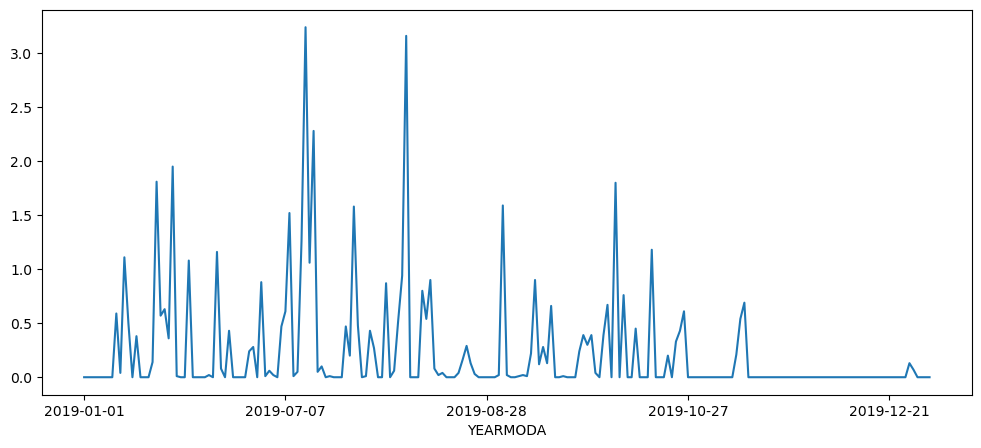

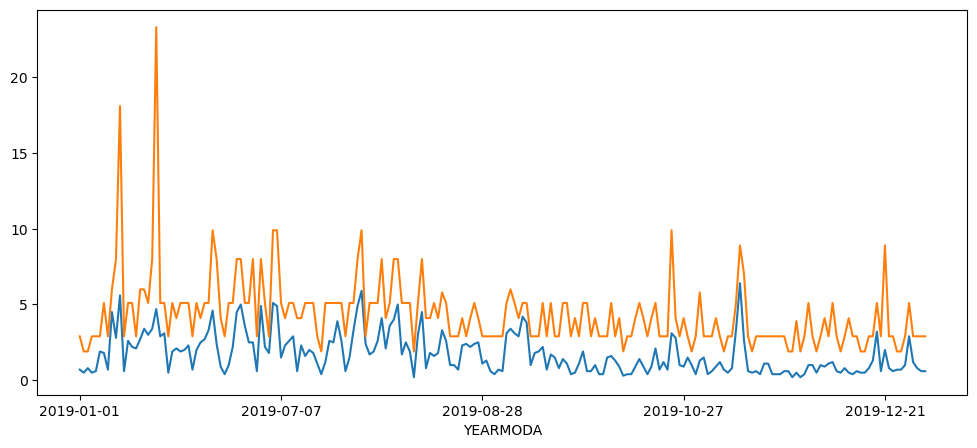

STN---    46.919431
WBAN      46.919431
YEAR      46.919431
MODA      46.919431
TEMP      46.919431
NTEMP     46.919431
DEWP      46.919431
NDEWP     46.919431
SLP       46.919431
NSLP      46.919431
STP       46.919431
NSTP      46.919431
VISIB     46.919431
NVISIB    46.919431
WDSP      46.919431
NWDSP     46.919431
MXSPD     46.919431
GUST      46.919431
MAX       46.919431
TMAX      46.919431
MIN       46.919431
TMIN      46.919431
PRCP      46.919431
TPRCP     46.919431
SNDP      46.919431
FRSHTT    46.919431
dtype: float64

In [357]:
#3. 降水量时间序列分布图
data['PRCP'].plot(figsize=(12, 5))
plt.show()
#季风性气候，剧烈变化的降水。11-12月（冬季）降水天数明显少

#4. 风速时间序列图
#日平均风速
data['WDSP'].plot(figsize=(12, 5))
#最大风速
data['MXSPD'].plot(figsize=(12, 5))
plt.show()
#呈现上下两条，趋势波动一致的折线，最大风出现在年初

#5. 当天发生了雾/雨/雪/冰雹/雷/台风的天数
a = data.count()
#共有211天测量数据
b = data.loc[data['FRSHTT'] != 0].count()
#99天发生了雾/雨/雪/冰雹/雷/台风
b/a*100
#简单地做一个比率是46.9%
#note that 这不是一个均匀的时间序列，上半年的数据很多缺失，所以这个数据几乎没意义